In [47]:
import matplotlib.pyplot as plt
import numpy as np
import vegas
import random as rand

alpha = 1 / 132.184
m_W = 80.379 #Gev
m_Z = 91.1876 #Gev
m_e = 0.511E-3 #Gev
m_m = 105.66E-3 #Gev
m_h = 125.1 #Gev
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e #Gev

def diff_decay(s, t, ml, v, CW, SW, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda):
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = (4 * e ** 2 * (m_h ** 4 + s ** 2)) / (t * u)
    struc_6 = 4 * 2 ** 0.5 * e * m_h ** 2 * (-(C_eB + C_eB_conj) * CW + (C_eW + C_eW_conj) * SW)
    struc_8 = 8 * t * u * (C_eB * CW - C_eW * SW) * (C_eB_conj * CW - C_eW_conj * SW)
    return [N * (ml / v) ** 2 * struc_4, N * (1 / Lambda ** 2) * (ml / v) * struc_6, N *(1 / Lambda ** 4) * struc_8]

def diff_dist(s, t, ml, v, CW, SW, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda):
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4_s = ((s**2+m_h**4)*(np.log(abs(t+s-2*ml**2-m_h**2))-np.log(t)))/(s-2*ml**2-m_h**2)
    struc_4_t = -((2*t**2+(-8*ml**2-4*m_h**2)*t+8*ml**4+8*m_h**2*ml**2+4*m_h**4)*np.log(abs(s+t-2*ml**2-m_h**2))+s**2+(-2*t+4*ml**2+2*m_h**2)*s)/(2*t)
    v_alt = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    N_6 = (v_alt * 2 * 2 ** 0.5 * m_h ** 2 * (C_eW * sin - C_eB * cos)) / (ml * e * Lambda ** 2)
    struc_6_s = N_6 * s
    struc_6_t = N_6 * t
    N_8 = (v_alt ** 2 * t * u * (C_eW * sin - C_eB * cos) ** 2) / (ml ** 2 * e ** 2 * Lambda ** 4)
    struc_8_s = N_8 * -(2*t**3+(3*s-3*ml**2-3*m_h**2)*t**2)/6
    struc_8_t = N_8 * -(t*(-s-t+ml**2+m_h**2)**2)/2
    return [struc_4_s, struc_4_t, struc_6_s, struc_6_t, struc_8_s, struc_8_t]

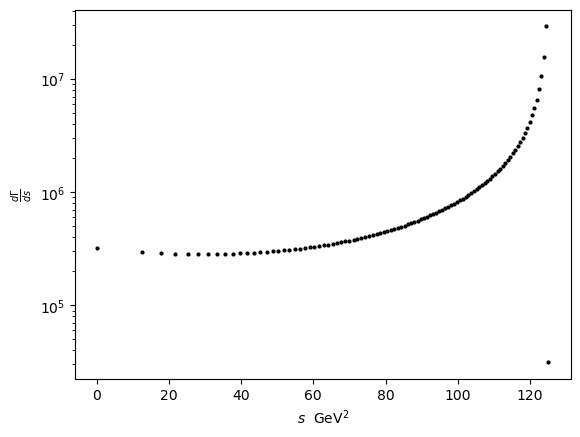

In [48]:
p_eB = 0
p_eW = 0
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_eW_conj = C_eW
C_eB_conj = C_eB
p_HD = -2
p_HWB = -2
C_HWB = 10 ** p_HWB
C_HD = 10 ** p_HD
p = 3
ml = m_m
Lambda = 10 ** p
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
ns = np.linspace(0, 1, 100)
ms = np.linspace(0, 1, 100)
s = (s_max_fix - s_min_fix) * ns + s_min_fix
t = (t_max_fix - t_min_fix) * ms + t_min_fix

fig, ax = plt.subplots()

#textstr = '\n'.join((
#    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
#    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
#    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$} GeV$^{2}$'))

#props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
#ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
#        verticalalignment='top', bbox=props)

ax.errorbar(s**0.5, diff_dist(s, t_max_fix, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda)[0]-diff_dist(s, t_min_fix, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda)[0], markersize = 4, marker = '.', ls = 'None', color = 'black')
plt.yscale('log')
plt.xlabel('$s$  GeV$^{2}$')
plt.ylabel(r'$\frac{d\Gamma}{ds}$')
#plt.ylim(-0.5*10**7, 10**6)
#plt.legend()
plt.show()

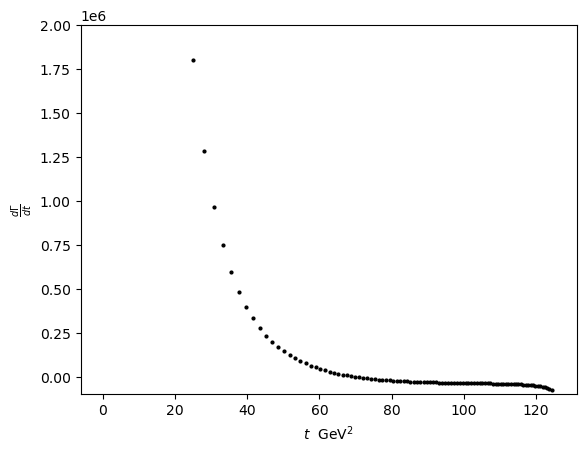

In [49]:
fig, ax = plt.subplots()

#textstr = '\n'.join((
#    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
#    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
#    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$} GeV$^{2}$'))

#props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
#ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
#        verticalalignment='top', bbox=props)

ax.errorbar(t**0.5, diff_dist(s_max_fix, t, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda)[1]-diff_dist(s_min_fix, t, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda)[1], markersize = 4, marker = '.', ls = 'None', color = 'black')
#plt.xscale('log')
plt.xlabel('$t$  GeV$^{2}$')
plt.ylabel(r'$\frac{d\Gamma}{dt}$')
plt.ylim(-10 ** 5,0.2 * 10**7)
#plt.legend()
plt.show()

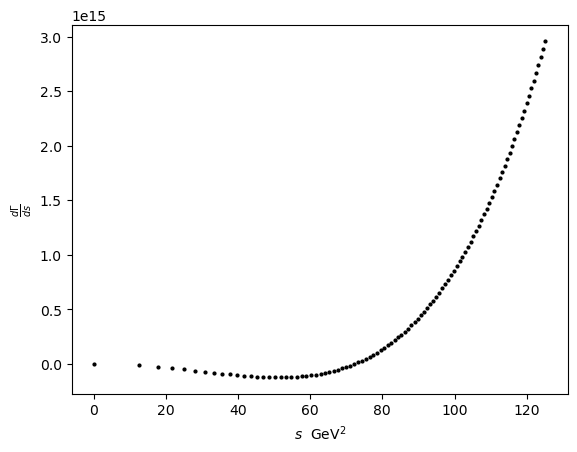

In [64]:
fig, ax = plt.subplots()

#textstr = '\n'.join((
#    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
#    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
#    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$} GeV$^{2}$'))

#props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
#ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
#        verticalalignment='top', bbox=props)

ax.errorbar(s**0.5, diff_dist(s, t_max_fix, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda)[4]-diff_dist(s, t_min_fix, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, C_HD, C_HWB, Lambda)[4], markersize = 4, marker = '.', ls = 'None', color = 'black')
#plt.yscale('log')
plt.xlabel('$s$  GeV$^{2}$')
plt.ylabel(r'$\frac{d\Gamma}{ds}$')
#plt.ylim(0,10**6)
#plt.legend()
plt.show()